<a href="https://colab.research.google.com/github/Niranjen99/Deep_Learning_Assessment_1/blob/main/Diabetes_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_svmlight_file
import urllib.request
import os

# Download the libsvm data from a URL
url = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes'
data_file = 'data.libsvm'

# Download the data from the URL
urllib.request.urlretrieve(url, data_file)

# Load the libsvm data using scikit-learn
X, y = load_svmlight_file(data_file)

# Convert sparse matrix to a dense NumPy array (if necessary)
X = X.toarray()

# Change label from -1 to 1 and 1 to 0
y = np.where(y == -1, 1, 0)




In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler and scale features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Sequential model
model = Sequential()

# Input layer directly connected to the output layer (Single Layer Perceptron)
model.add(Dense(1, input_dim=8, activation='sigmoid'))
#model.add(Dense(1, input_dim=8, activation='tanh'))

# Compile the model
#model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(), loss='MSE', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Train the model
hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3685 - loss: 0.2872 - val_accuracy: 0.4221 - val_loss: 0.2694
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3753 - loss: 0.2799 - val_accuracy: 0.4545 - val_loss: 0.2629
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3994 - loss: 0.2719 - val_accuracy: 0.4805 - val_loss: 0.2574
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3471 - loss: 0.2720 - val_accuracy: 0.4610 - val_loss: 0.2524
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3702 - loss: 0.2658 - val_accuracy: 0.5000 - val_loss: 0.2481
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3995 - loss: 0.2585 - val_accuracy: 0.5519 - val_loss: 0.2447
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4471 - loss: 0.2543 - val_accuracy: 0.5584 - val_loss: 0.2414
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4656 - loss: 0.2533 - val_accuracy: 0.5779 - 

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy_score(y_test, y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Confusion Matrix:
[[98  1]
 [51  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.99      0.79        99
           1       0.80      0.07      0.13        55

    accuracy                           0.66       154
   macro avg       0.73      0.53      0.46       154
weighted avg       0.71      0.66      0.56       154



0.6623376623376623

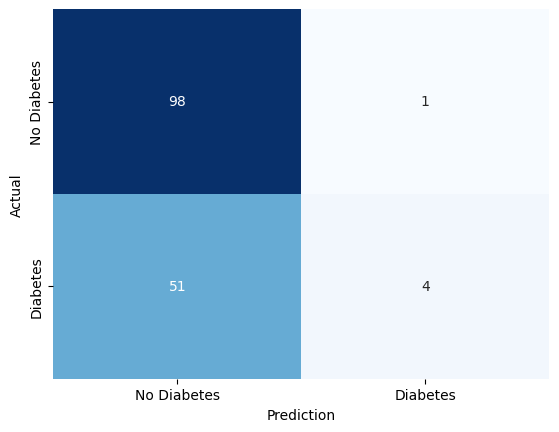

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cm, annot=True, xticklabels=["No Diabetes", 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'],
                 cbar=False, cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()



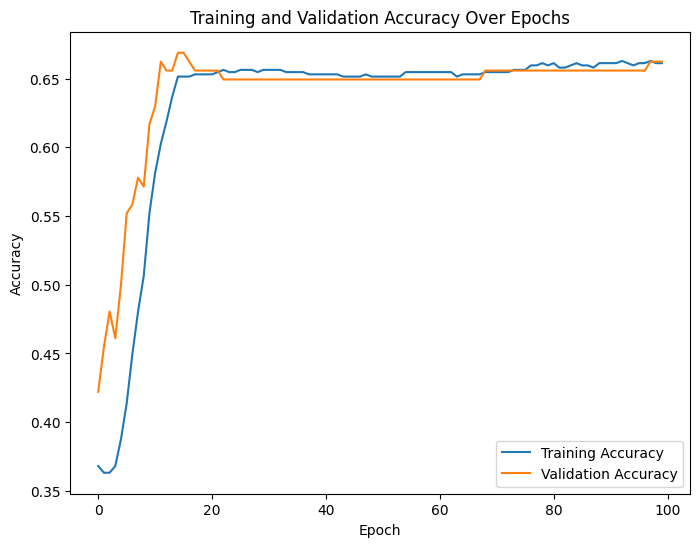

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


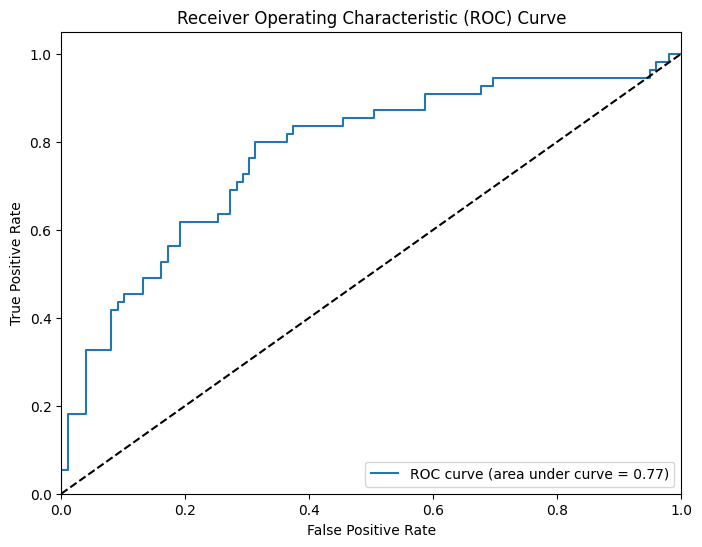

In [31]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for X_test
y_pred_prob = model.predict(X_test).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area under curve = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()